In [11]:
from collections import defaultdict

def getImmediateAncestors(filename):
    with open(filename, 'r') as file:
        # Cvorovi u DAG-u predstavljeni kroz mapu kao (cvor, [niz naslednika])
        nodes = defaultdict(list)
        
        # Dummy cvorovi source i super sink koji oznacavaju pocetak i kraj projekta
        sourceNodes = set()
        superSinkNodes = set()
        removeFromeSource = set()
        removeFromSuperSink = set()
        
        # Neophodna reprezentacija grafa za iscrtavanje
        GxNodes = set()
        GxEdges = []
            
        for line in file:
            node, ancestor = line.split()
            
            GxEdges.append((node, ancestor))
            
            nodes[node].append(ancestor)
            sourceNodes.add(node)
            superSinkNodes.add(ancestor)
            removeFromeSource.add(ancestor)
            removeFromSuperSink.add(node)
        
        for node in removeFromeSource:
            sourceNodes.discard(node)
        for node in removeFromSuperSink:
            superSinkNodes.discard(node)
            
        nodes['s'] = list(sourceNodes)
        nodes['ss'] = [None]
        for node in superSinkNodes:
            nodes[node].append('ss')
            GxEdges.append((node, 'ss'))
        
        for s in sourceNodes:
            GxEdges.append(('s', s))
        GxNodes = list(sourceNodes)
        
        for node in nodes:
            print(node, nodes[node])
#         print(sourceNodes)
#         print(superSinkNodes)
#         print(GxNodes)
#         print(GxEdges)
        return nodes, list(sourceNodes), GxEdges

In [12]:
nodes, GxNodes, GxEdges = getImmediateAncestors("graph1.txt")

2 ['6', '8', '14', '16', '18', '20', '23', '26', '28', '29', '30', '31', '35', '36', '40']
3 ['7', '8', '9', '11', '17', '18', '19', '20', '21', '22', '24', '28', '30', '31', '36', '38', '41', '43']
4 ['6', '7', '8', '10', '11', '14', '19', '21', '23', '24', '25', '26', '27', '32']
5 ['8', '11', '12', '13', '20', '22', '24', '30', '36', '40', '43']
1 ['11', '13', '15', '19', '20', '21', '23', '27', '29', '30', '39', '41', '44']
6 ['12', '14', '19', '21', '25', '26', '29', '31', '34', '37', '39', '41', '45']
7 ['11', '13', '15', '22', '26', '27', '29', '31', '37', '38', '39', '40']
8 ['10', '11', '12', '18', '20', '23', '25', '28', '37', '38', '39', '40', '41']
9 ['10', '11', '22', '26', '28', '31', '34', '38']
10 ['16', '17', '21', '24', '28', '29', '33', '36', '37', '39', '42', '43', '45']
11 ['16', '21', '22', '29', '42', '45']
12 ['16', '17', '18', '20', '25', '32', '41', '44']
13 ['16', '21', '22', '23', '28', '42']
14 ['19', '23', '24', '36', '37', '39', '40', '41', '42', '43']
15

In [17]:
import random 

def generateCostsForGraph(numOfNodes):
    for i in range(1, numOfNodes - 1):
        entry = "n" + " " + str(i) + " "
        numOfSteps = random.randrange(1,5)
        for step in range(numOfSteps):
            duration = random.uniform(step, step+1)
            cost = random.uniform(step, step + 1) * 10
            entry += "(" + str(duration) + "," + str(cost) + ")" + " "
        print(entry)
    print("n 's' (0,0)")
    print("n 'ss' (0,0)")

In [18]:
print(len(nodes))
generateCostsForGraph(len(nodes))

47
n 1 (0.8564169256829843,7.338132640222507) (1.0554552446067729,15.105262587927397) (2.011833816414268,29.059021623860257) 
n 2 (0.7057134904733556,2.7818975959245074) 
n 3 (0.7488210348236581,8.372197942579284) (1.3360328115807714,18.8521563424426) (2.022881025400131,29.796934455648696) 
n 4 (0.6247938742397139,3.401605676020658) (1.0939887214916832,19.600304887203883) (2.9499308196163345,29.10080254233872) 
n 5 (0.2261505736243341,1.8458312087196882) (1.2051890988965526,10.96871436284259) (2.2839727244947485,26.518810108357542) (3.4777215611409638,31.79167029120422) 
n 6 (0.38402504100375634,8.946369764038167) (1.8791746707253256,18.11523376575803) (2.4847300340700476,20.68733294218518) 
n 7 (0.8280103719206666,3.7488378075165043) (1.3707161224041724,18.323126299579396) (2.0609381396929427,28.172818706736695) 
n 8 (0.8475443406401447,6.208292887940816) (1.534205286800992,15.639083090840039) 
n 9 (0.8364081162773966,3.239137162548488) (1.65081672544168,16.962676247890617) 
n 10 (0.3

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def drawGraph(GxNodes, GxEdges):
    Gx = nx.Graph()
    Gx.add_nodes_from('s')
    Gx.add_nodes_from(GxNodes)
    Gx.add_edges_from(GxEdges)
    nx.draw_networkx(Gx,node_size=900, arrows=True, arrowstyle='-|>')

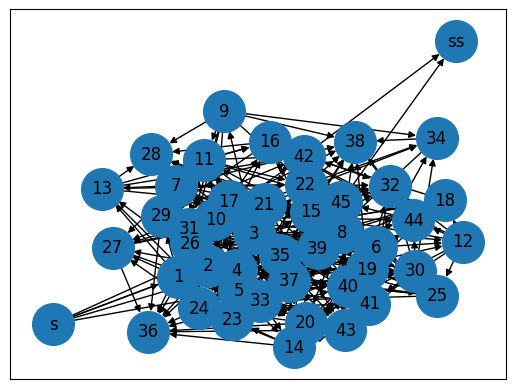

In [23]:
drawGraph(GxNodes, GxEdges)

In [24]:
def getCost(filename):
    
    with open(filename, 'r') as file:
        nodes = defaultdict(list)
        currentNode = -1
        
        for line in file:
            values = line.split()
            if values[0] == 'n':
                currentNode = values[1]
                nodes[currentNode] = []
            for index in range(2, len(values)):
                duration, cost = values[index].split(',')
                duration = float(duration[1:])
                cost = float(cost[:-1])
                nodes[currentNode].append((duration, cost))

        return nodes

In [27]:
costs = getCost("graph1costs.txt")
costs

defaultdict(list,
            {'1': [(0.8564169256829843, 7.338132640222507),
              (1.0554552446067729, 15.105262587927397),
              (2.011833816414268, 29.059021623860257)],
             '2': [(0.7057134904733556, 2.7818975959245074)],
             '3': [(0.7488210348236581, 8.372197942579284),
              (1.3360328115807714, 18.8521563424426),
              (2.022881025400131, 29.796934455648696)],
             '4': [(0.6247938742397139, 3.401605676020658),
              (1.0939887214916832, 19.600304887203883),
              (2.9499308196163345, 29.10080254233872)],
             '5': [(0.2261505736243341, 1.8458312087196882),
              (1.2051890988965526, 10.96871436284259),
              (2.2839727244947485, 26.518810108357542),
              (3.4777215611409638, 31.79167029120422)],
             '6': [(0.38402504100375634, 8.946369764038167),
              (1.8791746707253256, 18.11523376575803),
              (2.4847300340700476, 20.68733294218518)],
      